In [105]:
import csv
import random
import math
import sys
import numpy as np
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [106]:
def separate_data(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)

    return separated

In [107]:
def split_data(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))

    return [trainSet, copy]

In [108]:
def mean(numbers):
    return sum(numbers) / float(len(numbers))

In [109]:
def standard_deviation(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)

    return math.sqrt(variance)

In [110]:
def summarize(dataset):
    summaries = [(mean(attribute), standard_deviation(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]

    return summaries

In [111]:
def summarize_by_class(dataset):
    separated = separate_data(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)

    return summaries

In [112]:
def calculate_prob(x, mean, stdev):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [113]:
def calculate_class_prob(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            if stdev != 0:
                probabilities[classValue] *= calculate_prob(x, mean, stdev)  
    return probabilities

In [114]:
def predict(summaries, inputVector):
    probabilities = calculate_class_prob(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [115]:
def get_predictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [116]:
def get_accuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return correct / float(len(testSet))

def get_data_label(dataset):
    data = []
    label = []
    for x in dataset:
        data.append(x[:30])
        label.append(x[-1])
    return data, label


In [117]:
result_acc_ds1, result_acc_ds2 = [], []

In [118]:

# Đọc dữ liệu bệnh tim, phân loại nhị phân
with open('preprocessing/heart/X.pkl', 'rb') as f:
    X = pickle.load(f)
with open('preprocessing/heart/y.pkl', 'rb') as f:
    y = pickle.load(f)

dataset = np.concatenate((X.values, y.values.reshape(-1, 1)), axis=1)

In [119]:


def plot_line(title, xlabel, X, Y, classes):
    plt.figure(figsize=(6, 4))
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    color = ['r', 'b',]
    for i in range(len(classes)):
        plt.plot(X, Y[i], linestyle='solid', marker='o', color = color[i], label=classes[i])
    plt.legend(loc='best')

In [120]:
clf = GaussianNB()
max_accuracy = []

 25%|██▌       | 1/4 [00:00<00:01,  2.57it/s]

0.8292682926829268


 50%|█████     | 2/4 [00:00<00:00,  3.27it/s]

0.8260162601626017


100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

0.8536585365853658
0.8536585365853658


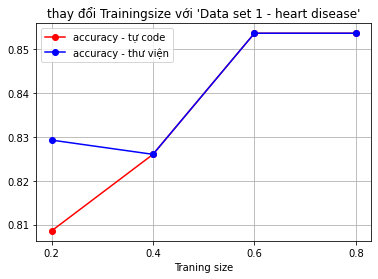

In [121]:
title = "thay đổi Trainingsize với 'Data set 1 - heart disease'"

xlabel = "Traning size"
X = []
Y1, Y2 = [], []

for k in tqdm([0.2, 0.4, 0.6, 0.8]):
    # Tự code
    trainingSet, testSet = split_data(dataset, k);
    summaries = summarize_by_class(trainingSet)
    predictions = get_predictions(summaries, testSet)
    acc = get_accuracy(testSet, predictions)
    X.append(str(k))
    Y1.append(acc)
    
    # Thư viện
    dataTrain, labelTrain = get_data_label(trainingSet)
    dataTest, labelTest = get_data_label(testSet)
    clf.fit(dataTrain, labelTrain)
    score = clf.score(dataTest, labelTest)
    print(score)
    Y2.append(score)
# Dataset 1
plot_line(title, xlabel, X, [Y1,Y2], ['accuracy - tự code', 'accuracy - thư viện' ])
plt.show()

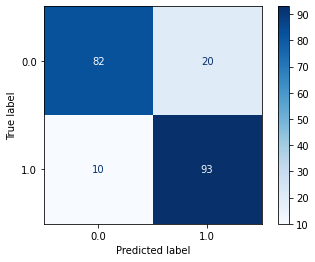

<Figure size 864x864 with 0 Axes>

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.85       102
         1.0       0.82      0.90      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [122]:
# Tự code

k = 0.8
trainingSet, testSet = split_data(dataset, k);
summaries = summarize_by_class(trainingSet)
predictions = get_predictions(summaries, testSet)
acc = get_accuracy(testSet, predictions)
max_accuracy.append(acc)
result_acc_ds1.append(acc)

# Thư viện
dataTrain, labelTrain = get_data_label(trainingSet)
dataTest, labelTest = get_data_label(testSet)
clf = GaussianNB()
clf.fit(dataTrain, labelTrain)
score = clf.score(dataTest, labelTest)
max_accuracy.append(score)
result_acc_ds1.append(score)

# Hiển thị confusion matrix
plot_confusion_matrix(clf, dataTest, labelTest, cmap = plt.cm.Blues)  
plt.figure(figsize = (12, 12))
plt.show()

from sklearn.metrics import classification_report
predictions = clf.predict(dataTest)
print(classification_report(labelTest, predictions))

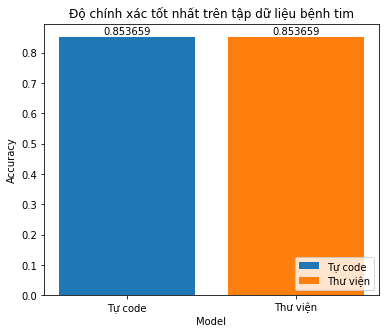

In [123]:
fig = plt.figure(figsize = (6, 5))
labels = ["Tự code", "Thư viện"]
# creating the bar plot
p1 = plt.bar(labels[0], max_accuracy[0])
p2 = plt.bar(labels[1], max_accuracy[1])

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Độ chính xác tốt nhất trên tập dữ liệu bệnh tim")
plt.bar_label(p1)
plt.bar_label(p2)
plt.xticks(np.arange(len(labels)), labels)
plt.legend(labels, loc ="lower right")
plt.show()

In [124]:
# dataset 2

# Đọc dữ liệu bệnh gan, phân loại nhị phân
with open('preprocessing/cirrhosis/X.pkl', 'rb') as f:
    X_cir = pickle.load(f)
with open('preprocessing/cirrhosis/y.pkl', 'rb') as f:
    label_cir = pickle.load(f)

dataset_cir = np.concatenate((X_cir.values, label_cir.values.reshape(-1, 1)), axis=1)

In [125]:
def get_data_label(dataset):
    data = []
    label = []
    for x in dataset:
        data.append(x[:21])
        label.append(x[-1])
    return data, label

In [126]:
max_accuracy_2 = []

  0%|          | 0/4 [00:00<?, ?it/s]C:\Users\dovan\AppData\Local\Temp/ipykernel_8896/181271505.py:3: RuntimeWarning: invalid value encountered in double_scalars
  variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
100%|██████████| 4/4 [00:00<00:00,  7.11it/s]


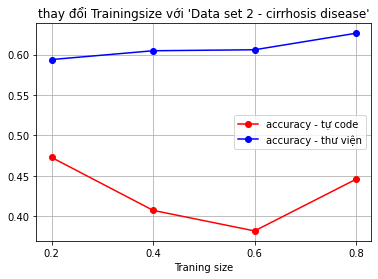

In [127]:
title = "thay đổi Trainingsize với 'Data set 2 - cirrhosis disease'"
xlabel = "Traning size"
X = []
Y1, Y2 = [], []

for k in tqdm([0.2, 0.4, 0.6, 0.8]):
    # Tự code
    trainingSet, testSet = split_data(dataset_cir, k);
    summaries = summarize_by_class(trainingSet)
    predictions = get_predictions(summaries, testSet)
    acc = get_accuracy(testSet, predictions)
    X.append(str(k))
    Y1.append(acc)
    
    # Thư viện
    X_train, y_train = get_data_label(trainingSet)
    X_test, y_test = get_data_label(testSet)
    clf = BernoulliNB()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    Y2.append(score)
plot_line(title, xlabel, X, [Y1,Y2], ['accuracy - tự code', 'accuracy - thư viện' ])
plt.show()

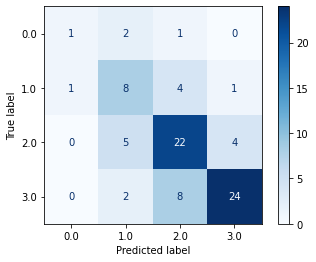

<Figure size 864x864 with 0 Axes>

              precision    recall  f1-score   support

         0.0       0.50      0.25      0.33         4
         1.0       0.47      0.57      0.52        14
         2.0       0.63      0.71      0.67        31
         3.0       0.83      0.71      0.76        34

    accuracy                           0.66        83
   macro avg       0.61      0.56      0.57        83
weighted avg       0.68      0.66      0.66        83



In [128]:
# Tự code
k = 0.8
trainingSet, testSet = split_data(dataset_cir, k);
summaries = summarize_by_class(trainingSet)
predictions = get_predictions(summaries, testSet)
accuracy = get_accuracy(testSet, predictions)
max_accuracy_2.append(accuracy)
result_acc_ds2.append(accuracy)

# Thư viện
clf = BernoulliNB()
dataTrain, labelTrain = get_data_label(trainingSet)
dataTest, labelTest = get_data_label(testSet)
clf.fit(dataTrain, labelTrain)
score = clf.score(dataTest, labelTest)
max_accuracy_2.append(score)
result_acc_ds2.append(score)

# Hiển thị confusion matrix
plot_confusion_matrix(clf, dataTest, labelTest, cmap = plt.cm.Blues)  
plt.figure(figsize = (12, 12))
plt.show()

from sklearn.metrics import classification_report
predictions = clf.predict(dataTest)
print(classification_report(labelTest, predictions))

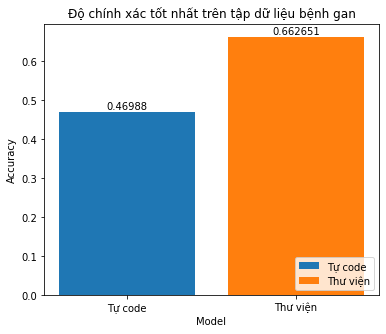

In [129]:
fig = plt.figure(figsize = (6, 5))
labels = ["Tự code", "Thư viện"]
# creating the bar plot
p1 = plt.bar(labels[0], max_accuracy_2[0])
p2 = plt.bar(labels[1], max_accuracy_2[1])

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Độ chính xác tốt nhất trên tập dữ liệu bệnh gan")
plt.bar_label(p1)
plt.bar_label(p2)
plt.xticks(np.arange(len(labels)), labels)
plt.legend(labels, loc ="lower right")
plt.show()

In [131]:
import pickle

with open('result/Naive.pkl', 'wb') as f:
    pickle.dump([result_acc_ds1, result_acc_ds2], f)